<h1> Checkpoint:</h1>

**Looking to see completetion and effort in completing the checkpoint. It's okay if it's not correct**

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>I wonder if we can predict total student enrollment using data on Total revenue (not sure whats exactly the difference/mechanism between federal/state/local revenue and expenditure so lets just use Total revenue. The idea is that if a state gets more money they likely enroll more students.)
Anyway I ended up doing analysis on what would predict total revenue using different features of enrollment

* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import numpy, pandas, matplotlib, and seaborn

(Feel free to import other libraries!)

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
#imported library (this step took longer than it should lol)

Matplotlib is building the font cache; this may take a moment.
Fontconfig warning: ignoring UTF-8: not a valid region tag


Load in the "states_edu.csv" dataset and take a look at the head of the data

In [5]:
df = pd.read_csv('../data/states_edu.csv')
df.shape
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. \ Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [28]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_ESTIMATE',
    #above are column renames that already exsited in tutorial2
    'AVG_MATH_4_SCORE':'MATHAVG_GRADE4',
    'AVG_MATH_8_SCORE':'MATHAVG_GRADE8',
    'AVG_READING_4_SCORE':'READAVG_GRADE4',
    'AVG_READING_8_SCORE':'READAVG_GRADE8'
    },
    axis=1,inplace=True)

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: **<Total number of enrolled students per state (ENROLL_ALL)>**  

**(hit `Enter` to edit)**

Outcome Score in the questions refers to the outcome variable you chose here.

How many different years of data are in our dataset? Use a pandas function.

In [10]:
df.YEAR.describe()#we have data from 1986to2019! yay

count    1715.000000
mean     2002.075219
std         9.568621
min      1986.000000
25%      1994.000000
50%      2002.000000
75%      2010.000000
max      2019.000000
Name: YEAR, dtype: float64

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [21]:
STATE = df.groupby("STATE")
STATE["TOTAL_REVENUE"].mean()
#ohio is slightly larger than michigan!
#not sure how to do it for only michigan/Ohio ;-;

STATE
ALABAMA                  5545854.92
ALASKA                   1720039.64
ARIZONA                  6577442.12
ARKANSAS                 3611403.96
CALIFORNIA              55799199.28
COLORADO                 6458119.96
CONNECTICUT              7482379.56
DELAWARE                 1356966.92
DISTRICT_OF_COLUMBIA     1020790.28
DODEA                           NaN
FLORIDA                 20865131.36
GEORGIA                 13436232.48
HAWAII                   2005602.32
IDAHO                    1668166.68
ILLINOIS                21272992.48
INDIANA                  9824788.84
IOWA                     4675771.60
KANSAS                   4289005.16
KENTUCKY                 5281914.56
LOUISIANA                6034237.48
MAINE                    2128856.76
MARYLAND                 9707408.48
MASSACHUSETTS           11832922.32
MICHIGAN                16877091.20
MINNESOTA                8524971.68
MISSISSIPPI              3375499.80
MISSOURI                 7745905.00
MONTANA               

Find the average for your outcome score across all states in 2019

In [18]:
#idk how to do this ;-; how do I isolate states in 2019?

Find the maximum outcome score for every state. Hint: there's a function that allows you to do this easily

In [19]:
STATE = df.groupby("STATE")
STATE["TOTAL_REVENUE"].max()
##hmm it is esy

STATE
ALABAMA                  7726213.0
ALASKA                   2920986.0
ARIZONA                  9272152.0
ARKANSAS                 5401016.0
CALIFORNIA              89217262.0
COLORADO                10123271.0
CONNECTICUT             11419673.0
DELAWARE                 2043577.0
DISTRICT_OF_COLUMBIA     1382282.0
DODEA                          NaN
FLORIDA                 30001821.0
GEORGIA                 19403453.0
HAWAII                   3030519.0
IDAHO                    2266490.0
ILLINOIS                32908958.0
INDIANA                 14023240.0
IOWA                     6919477.0
KANSAS                   6069563.0
KENTUCKY                 7745928.0
LOUISIANA                8477993.0
MAINE                    2845391.0
MARYLAND                14491642.0
MASSACHUSETTS           17484704.0
MICHIGAN                20576110.0
MINNESOTA               12186135.0
MISSISSIPPI              4755399.0
MISSOURI                10893231.0
MONTANA                  1804339.0
NATIONAL      

<h2> Feature Selection </h2>

After exploring the data, you now have to choose features that you would use to predict the performance of the students on a chosen test (chosen outcome variable). By the way, you can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features

In [31]:
df['TOTAL_EXPENDITURE_PER_STUDENT'] = df['TOTAL_EXPENDITURE'] / df['ENROLL_ALL']

count    1275.000000
mean        9.725949
std         3.748900
min         2.306811
25%         6.859619
50%         9.182504
75%        11.650409
max        25.013784
Name: TOTAL_EXPENDITURE_PER_STUDENT, dtype: float64

Final feature list: **<LIST FEATURES HERE\>**

Expenditure/student 

Total enrollment

Feature selection justification: **<BRIEFLY DESCRIBE WHY YOU PICKED THESE FEATURES\>**

Expenditure/student -> +maybe if a state has more total revenue they will spend more/less on each student. (for ex designing each state's curriculum probably costs the same, but is taught to different amount of students, lets see if this econ concept applies to education!)

Total enrollment -> As I mentioned in the abstract, if a state receives more money they can probably afford to enroll more students. Lets see if this is true!

<h2>Visualization</h2>

Use any graph you wish to see the relationship of your chosen outcome variable with any features you chose

**Visualization 1**

Text(0, 0.5, 'total expenditure per student')

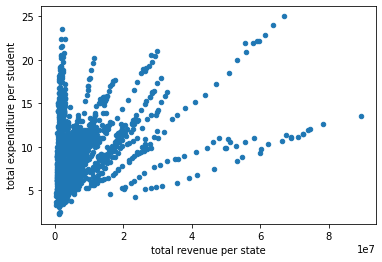

In [30]:
df.plot.scatter(x='TOTAL_REVENUE',y='TOTAL_EXPENDITURE_PER_STUDENT')
plt.xlabel('total revenue per state')
plt.ylabel('total expenditure per student')

**<CAPTION FOR VIZ 1>**

#There doesnt seem to be much correlation between the two factors, or at least the "total revenue per state" data needs a lot of cleaning. (not sure how to do that though ;)

**Visualization 2**

Text(0, 0.5, 'total enrollment per state')

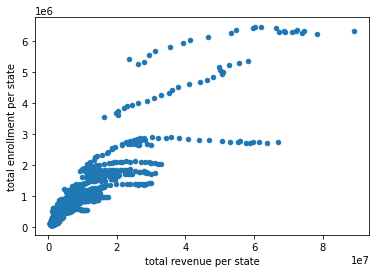

In [32]:
df.plot.scatter(x='TOTAL_REVENUE',y='ENROLL_ALL')
plt.xlabel('total revenue per state')
plt.ylabel('total enrollment per state')

**<CAPTION FOR VIZ 2>**

Like the previous graphs, there sure are a lot of outliers. But it seems like revenue does have a correlation with the total enrollment per state.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X = df[['TOTAL_EXPENDITURE','YEAR','ENROLL_ALL']].dropna()
       #choose 3 variables as input for ML model
y = df.loc[X.index]['TOTAL_REVENUE']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=.3, random_state=0)
#havent done ML before. 

<h2> Prediction </h2>

ML Models Resource: https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a

Chosen ML task: **<REGRESSION/CLASSIFICATION>**

In [36]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [37]:
# create your model here
model = LinearRegression()

In [38]:
model.fit(X_train, y_train)

LinearRegression()

In [39]:
y_pred = model.predict(X_test)

In [ ]:
# FOR CLASSIFICATION ONLY:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test,
                         cmap=plt.cm.Blues)

/usr/local/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'ENROLL_ALL')

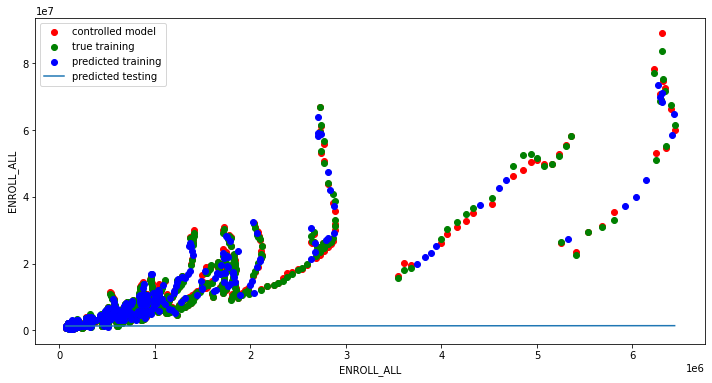

In [41]:
# FOR REGRESSION ONLY: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = 'ENROLL_ALL'
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel('ENROLL_ALL')

<h2> Summary </h2>

**<WRITE A PARAGRAPH SUMMARIZING YOUR WORK AND FINDINGS\>**

#gotta be honest with you. This is my first time writing python/using vs code/doing ML related stuff. But I really enjoyed doing this. Legit pretty fun.

I analyzed correlation between Total revenue of states and their total enrollment of students over a roughly ~30 year period. Several states exhibit themselves as outliers in that they enroll more students and receive more in revenue. However a general trend between total revenue and total enrollment is evident. The ML model is pretty accurate too.